# Este script foi criado por Marcos Assis, com a finalidade de: 

## Obter as cotações de ativos da base do Yahoo Finance que compõem o índice Bovespa (IBOV);

## As seguintes operações serão realizadas após a obtenção das cotações dos ativos:

### - cálculo das médias móveis exponenciais de 10 e 21 dias;
### - cálculo dos retornos diários;
### - cálculo dos retornos mensais;
### - cálculo dos retornos anuais;
### - cálculo dos retornos médios (diários, mensais, anuais);
### - cálculo das volatilidades (diárias, mensais, anuais);
### - cálculo do índice sharpe das bases (diárias, mensais, anuais);
### - seleção dos ativos com tendência de alta (médias móveis de 10 dias maior que as médias móveis de 21 dias);
### - seleção dos ativos com indicação de compra;
### - plotagem dos gráficos das médias móveis;
### - plotagem do gráfico dos retornos cumulativos mensais para identificação dos ativos que tiveram melhor crescimento ao longo do tempo.

## Nome do script: RiscoRetornoAtivos.ipynb


In [1]:
# Baixar algumas bibliotecas
!pip install yfinance --upgrade --no-cache-dir

In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fpdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importar bibliotecas básicas
import numpy as np #cálculos em Arrays Multidimensionais
import pandas as pd #manipulação e análise de dados
import matplotlib.pyplot as plt #plotagem e configuração dos gráficos
from fpdf import FPDF #geração de documentos em pdf

In [5]:
# Importar a biblioteca de finanças
import yfinance as yf
yf.pdr_override()

In [6]:
# Importar a biblioteca para a nossa manipulação e análise de dados da web
import pandas_datareader.data as web

In [7]:
# Configura a dimensão da nossa janela de resultado
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [8]:
# Define um período para análise dos dados da web
startday = '2016-07-08'
endday = '2021-07-08'

In [12]:
ativos = [
'ABCB4.SA',
'AERI3.SA',    
'ALUP11.SA',
'ALSO3.SA',    
'AZUL4.SA',
'B3SA3.SA',
'BBAS3.SA',
'BBDC4.SA',
'BBSE3.SA',
'BCFF11.SA',
'BEES3.SA',          
'BRAP4.SA',
'BRCR11.SA',
'BRDT3.SA',
'BRKM5.SA',    
'BRML3.SA',
'BRSR6.SA',
'CAML3.SA',
'CARD3.SA',
'CESP6.SA',
'CGRA4.SA',
'CMIG4.SA',
'COGN3.SA',
'CYRE3.SA',    
'CPLE3.SA',
'CPLE6.SA',
'CSMG3.SA',
'CSNA3.SA',
'CVCB3.SA',
'DIRR3.SA',          
'DTEX3.SA',
'EGIE3.SA',    
'ELET3.SA',
'EQTL3.SA',    
'EMBR3.SA',
'ENAT3.SA',
'ENBR3.SA',
'FESA4.SA',
'GGBR4.SA',
'GMAT3.SA',    
'GOAU4.SA',
'GRND3.SA',
'HAPV3.SA',
'HGBS11.SA',
'HGRE11.SA',
'HGTX3.SA',
'IGTA3.SA',
'IRDM11.SA',
'ITSA4.SA',
'ITUB3.SA',
'ITUB4.SA',
'IVVB11.SA',          
'JHSF3.SA',
'JSRE11.SA',
'KLBN11.SA',
'KNCR11.SA',
'KNRI11.SA',
'LAME4.SA',
'LAVV3.SA',    
'LREN3.SA',
'LWSA3.SA',
'JBSS3.SA',
'MEAL3.SA',    
'MELK3.SA',
'MGLU3.SA',
'MRVE3.SA',
'MULT3.SA',
'MXRF11.SA',
'MYPK3.SA',
'NEOE3.SA',
'OMGE3.SA',
'PETR4.SA',
'PFRM3.SA',
'POMO4.SA',
'POSI3.SA',    
'PRIO3.SA',
'PTBL3.SA',    
'QUAL3.SA',
'RADL3.SA',    
'RAIL3.SA',
'RANI3.SA',          
'RAPT4.SA',
'RENT3.SA',  
'ROMI3.SA',
'RRRP3.SA',    
'SANB4.SA',
'SAPR11.SA',
'SAPR4.SA',
'SHUL4.SA',    
'SLCE3.SA',
'STBP3.SA',
'SULA4.SA',          
'SULA11.SA',
'TAEE4.SA',
'TEND3.SA',
'TESA3.SA',    
'TGMA3.SA', 
'TRIS3.SA',
'TRPL4.SA',
'UNIP6.SA',
'USIM5.SA',
'VALE3.SA',
'VIVT3.SA',
'VLID3.SA',
'VVAR3.SA',
'WEGE3.SA',
'XPLG11.SA',
'YDUQ3.SA'
]

In [13]:
k = 0

# Cria uma lista vazia
row_list =[]

for i in ativos:
    
    # Obtém os preços dos ativos
    precos = web.get_data_yahoo(ativos[k], start=startday, end=endday)

    # Calcula as médias móveis exponenciais
    precos['mm10'] = precos['Adj Close'].ewm(span=10).mean()   
    precos['mm21'] = precos['Adj Close'].ewm(span=21).mean()
    
    # Calcula o retorno diário
    precos['Retorno'] = precos['Adj Close'].pct_change()
    
    # Calcula os retornos mensais e anuais
    varMes = precos['Adj Close'].resample('M').ffill().pct_change()
    varAno = precos['Adj Close'].resample('Y').ffill().pct_change()
    
    # Armazena os retornos médios
    retorno_medio_diario = precos['Retorno'].mean()
    retorno_medio_mensal = varMes.mean()
    retorno_medio_anual = varAno.mean()

    # Armazena as volatilidades
    volatilidade_diaria = precos['Retorno'].std()
    volatilidade_mensal = varMes.std()
    volatilidade_anual = varAno.std()

    # Armazena os Indíces Sharp
    isharpe_diario =  (retorno_medio_diario - 0.0001) / volatilidade_diaria
    isharpe_mensal = (retorno_medio_mensal - 0.0037) / volatilidade_mensal
    isharpe_anual =  (retorno_medio_anual - 0.045) / volatilidade_anual

    # Analisa e armazena a tendência do ativo 
    operacoes_tendencia_alta = precos['mm10'] > precos['mm21']
    
    # Verifica se o ativo está em tendência de alta nos últimos 60 dias 
    tendencia = operacoes_tendencia_alta.tail(1)
    tendencia_alta = tendencia.iloc[0]
        
    # Filtro geral para compra ou não do ativo
    compra = (isharpe_diario > 1 or isharpe_mensal > 1 or isharpe_anual > 1) & tendencia_alta  
    
    # Prepara os valores para o novo dataframe
    valores = [ativos[k], retorno_medio_diario * 100, retorno_medio_mensal * 100, retorno_medio_anual * 100, volatilidade_diaria * 100, volatilidade_mensal * 100, volatilidade_anual * 100, isharpe_diario, isharpe_mensal, isharpe_anual, tendencia_alta, compra]
    
    # Adiciona uma nova linha na lista final
    row_list.append(valores)

    # columns
    columns = ['Ativo', 'Retorno Méd. Diário', 'Retorno Méd. Mensal', 'Retorno Méd. Anual', 'Vol. Diária', 'Vol. Mensal', 'Vol. Anual', 'Isharpe Diário', 'Isharpe Mensal', 'Isharpe Anual', 'Tendência_Alta', 'Compra']
    
    # Cria um novo dataframe
    bd_ativos = pd.DataFrame(row_list, columns=columns)
    
    k += 1
        

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [14]:
pd.options.display.max_rows = 1000

In [15]:
bd_ativos.dropna()

,Ativo,Retorno Méd. Diário,Retorno Méd. Mensal,Retorno Méd. Anual,Vol. Diária,Vol. Mensal,Vol. Anual,Isharpe Diário,Isharpe Mensal,Isharpe Anual,Tendência_Alta,Compra
0,ABCB4.SA,0.060920,1.117375,10.407949,2.110424,9.424855,21.894358,0.024128,0.079298,0.269839,False,False
2,ALUP11.SA,0.071283,1.207616,13.993593,1.528279,6.472954,23.741015,0.040099,0.129402,0.399882,False,False
3,ALSO3.SA,0.079695,1.294373,21.299430,2.597024,10.980820,53.770206,0.026837,0.084181,0.312430,False,False
4,AZUL4.SA,0.148906,2.788459,17.931507,4.098101,17.526448,40.094120,0.033895,0.137989,0.334999,False,False
5,B3SA3.SA,0.121485,2.247113,31.293937,2.379668,8.937957,31.737771,0.046849,0.210016,0.844229,False,False
6,BBAS3.SA,0.106088,1.797093,10.402997,2.736669,11.984345,30.430699,0.035111,0.119080,0.193982,False,False
7,BBDC4.SA,0.077745,1.416898,12.714593,2.332783,9.797565,22.937403,0.029041,0.106853,0.358131,False,False
8,BBSE3.SA,0.031888,0.406598,5.190766,1.805188,6.700073,24.918851,0.012125,0.005462,0.027721,False,False
10,BEES3.SA,0.108146,2.098306,23.633315,1.867452,7.764656,30.439295,0.052556,0.222586,0.628573,False,False
11,BRAP4.SA,0.226816,4.293413,49.272297,2.741682,11.085246,38.454924,0.079082,0.353931,1.164280,True,True


In [16]:
# Filtra os preços com tendência de alta e indicação de compra
bd_ativos_filtrados = bd_ativos.query('Tendência_Alta == True and Compra == True')

In [17]:
bd_ativos_filtrados

,Ativo,Retorno Méd. Diário,Retorno Méd. Mensal,Retorno Méd. Anual,Vol. Diária,Vol. Mensal,Vol. Anual,Isharpe Diário,Isharpe Mensal,Isharpe Anual,Tendência_Alta,Compra
11,BRAP4.SA,0.226816,4.293413,49.272297,2.741682,11.085246,38.454924,0.079082,0.353931,1.164280,True,True
30,DTEX3.SA,0.125421,2.369687,30.877524,2.877387,11.987501,12.608526,0.040113,0.166814,2.092039,True,True
75,PRIO3.SA,0.443459,9.240686,136.750613,4.266302,20.061495,113.605534,0.101601,0.442175,1.164121,True,True
82,RENT3.SA,0.194857,3.644314,50.898357,2.876314,11.151352,40.492872,0.064269,0.293625,1.145840,True,True
89,SLCE3.SA,0.221378,4.409020,63.289735,2.437137,10.696024,38.839230,0.086732,0.377619,1.513669,True,True
99,UNIP6.SA,0.339681,7.140778,120.184757,3.066989,14.952384,104.333003,0.107493,0.452823,1.108803,True,True
101,VALE3.SA,0.211664,3.851722,42.559807,2.682908,9.276734,25.622165,0.075166,0.375318,1.485425,True,True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


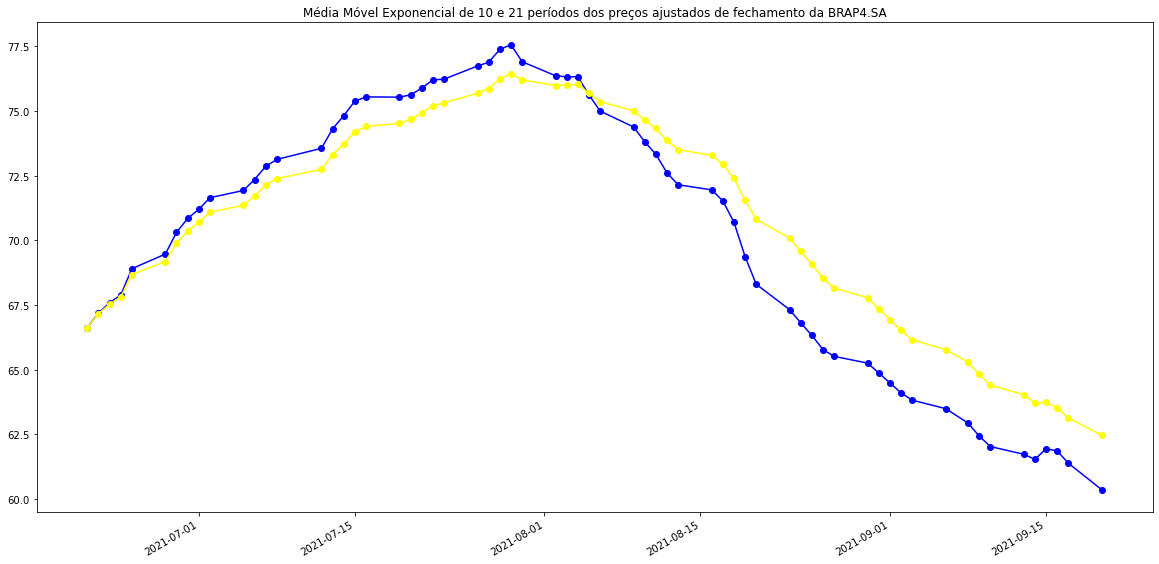

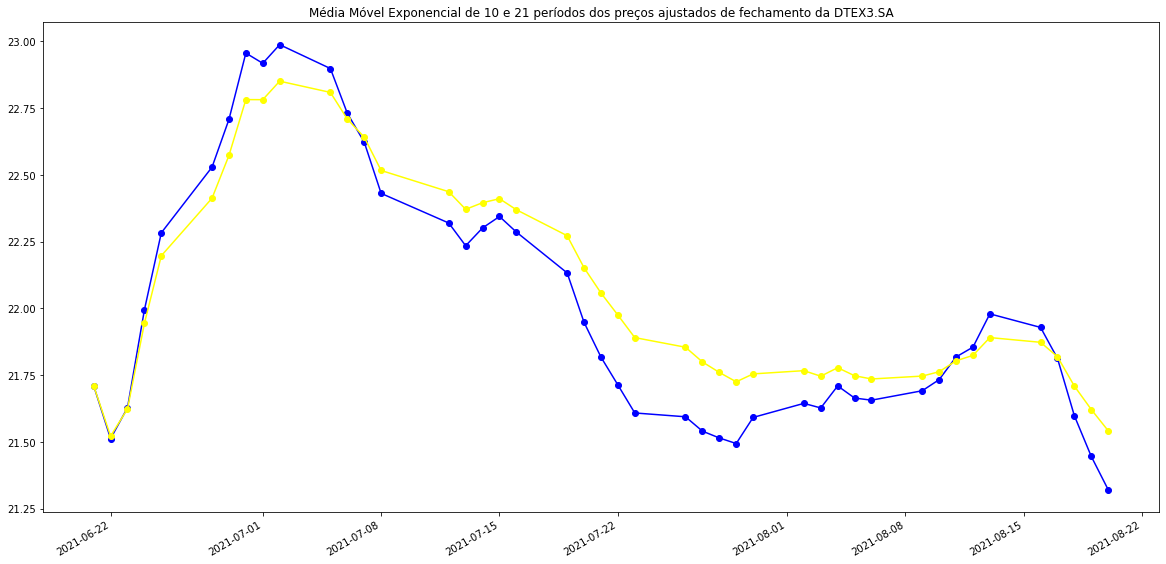

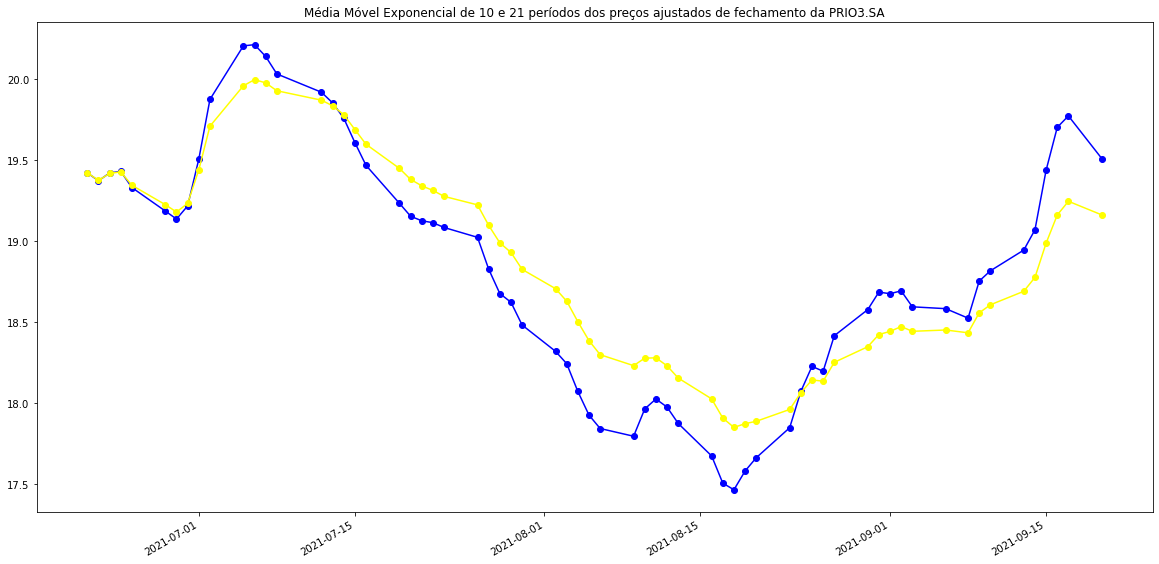

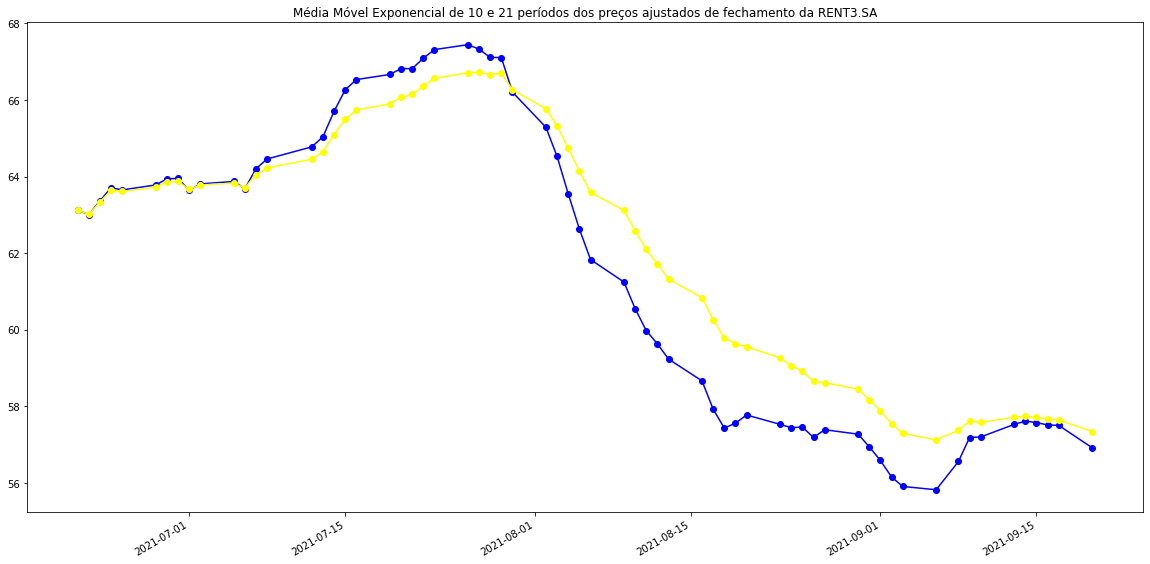

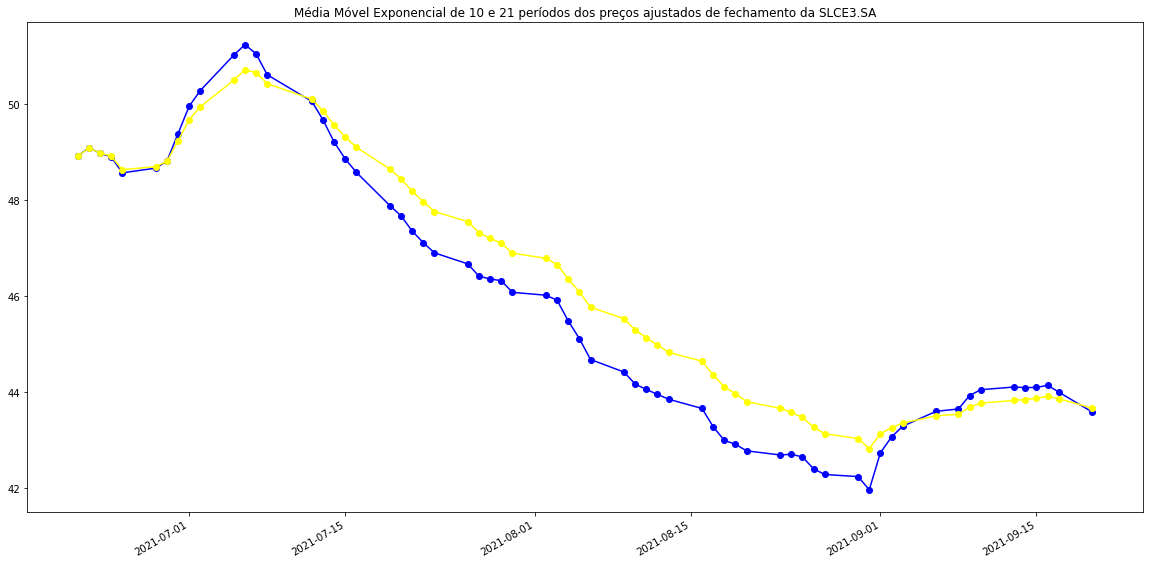

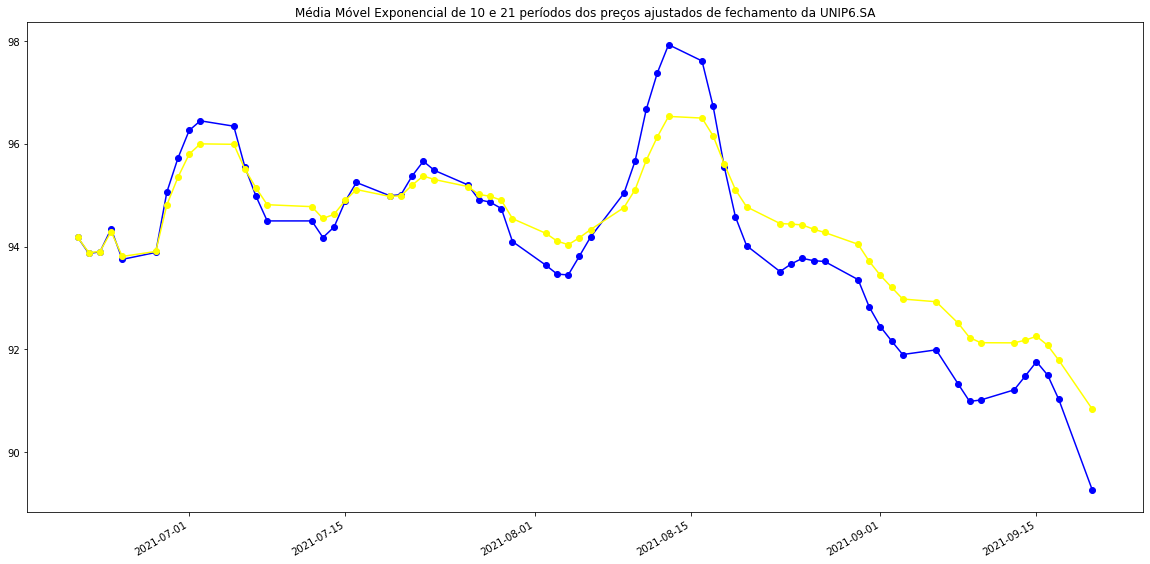

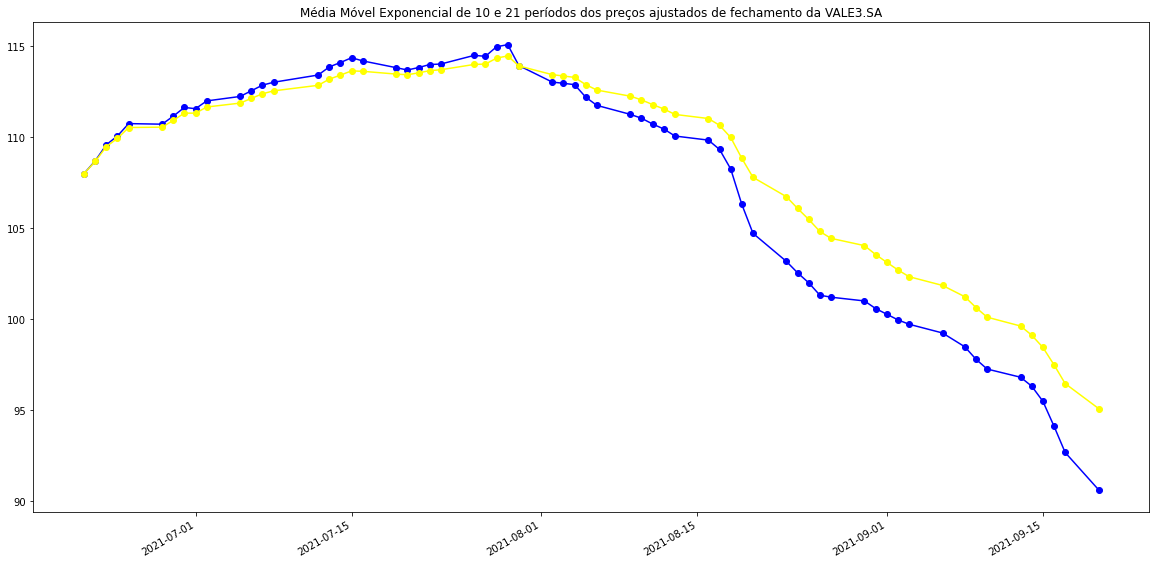

In [18]:
k = 0

# Obtem o conjunto de ativos
tikers = bd_ativos_filtrados['Ativo'].array

for i in tikers:
        
    # Ativo atual
    ticker = tikers[k]
        
    # Obtem as cotações
    cotacoes = yf.download(ticker, period='3mo') 
    
    # Calcula as médias móveis exponenciais
    cotacoes['mm10'] = cotacoes['Adj Close'].ewm(span=10).mean()   
    cotacoes['mm21'] = cotacoes['Adj Close'].ewm(span=21).mean()
        
    # Gerando o gráfico para cada um dos ativos selecionados
    fig, ax = plt.subplots()

    #Plot
    ax.plot(cotacoes['mm10'], label="mm10", color='blue', marker='o')
    ax.plot(cotacoes['mm21'], label="mm21", color='yellow', marker='o')

    #formatar
    ax.set_title('Média Móvel Exponencial de 10 e 21 períodos dos preços ajustados de fechamento da ' + ticker)
    fig.autofmt_xdate()
    
    fig.savefig(ticker + '.pdf', bbox_inches='tight')
    
    k += 1
    

[*********************100%***********************]  7 of 7 completed


<Figure size 1440x720 with 0 Axes>

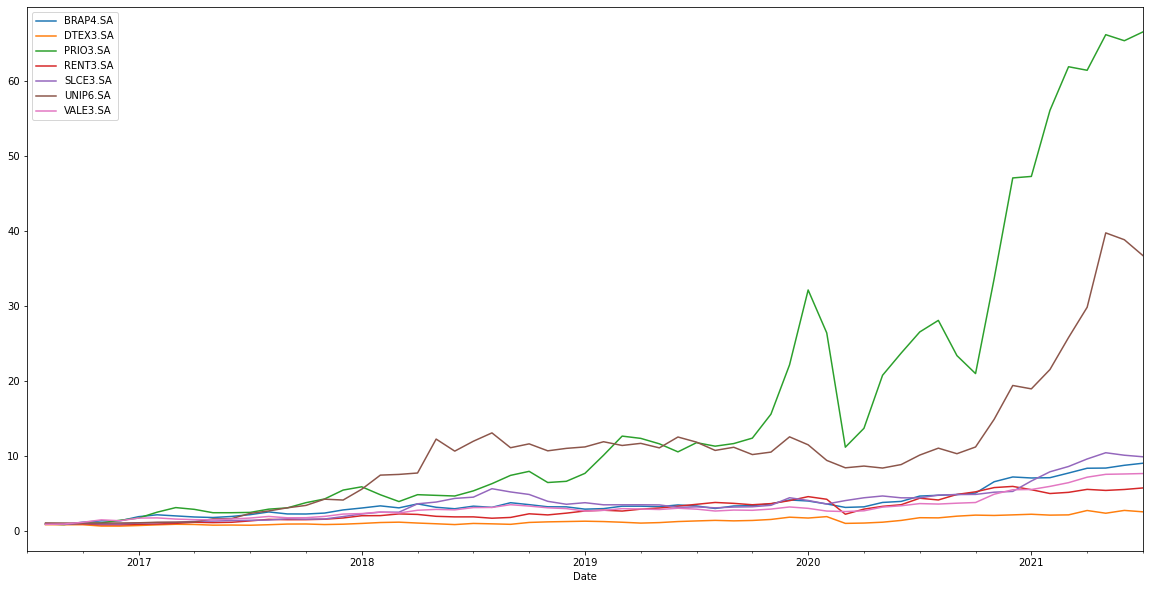

In [19]:
# Downloading das cotações para múltiplos ativos
tickers = ["BRAP4.SA", "DTEX3.SA", "PRIO3.SA", "RENT3.SA", "SLCE3.SA", "UNIP6.SA", "VALE3.SA"]
multpl_stocks = web.get_data_yahoo(tickers, start = "2016-07-08", end = "2021-07-08")

# Calculando os retornos para múltiplos ativos
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()

# Plotando no gráfico
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

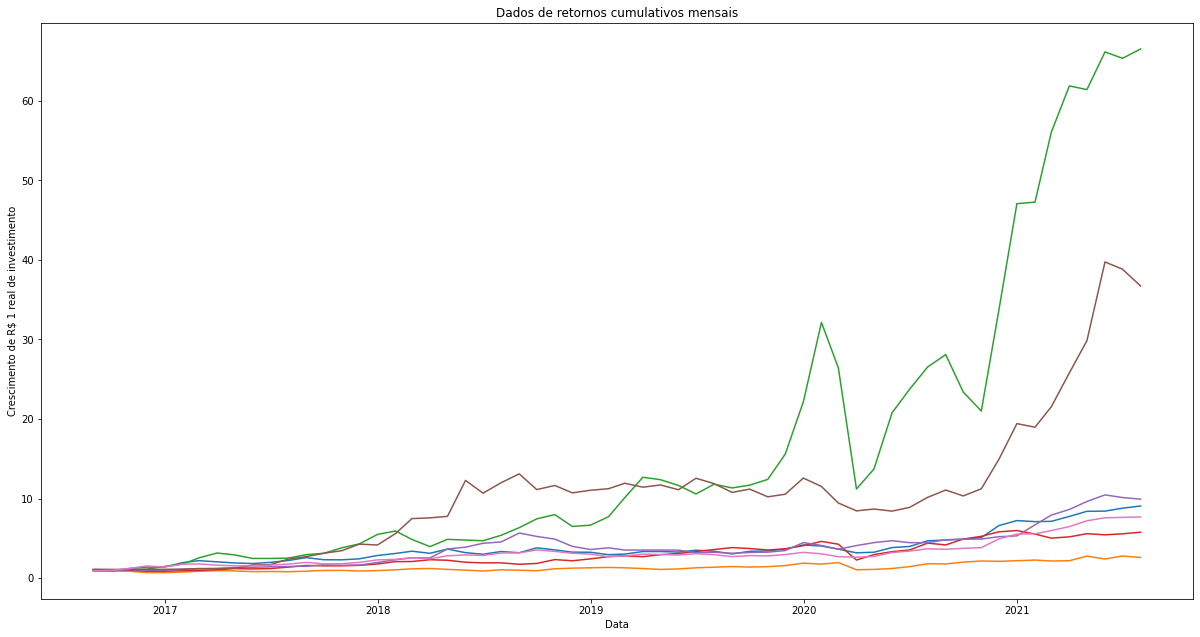

In [20]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
cum_returns = (multpl_stock_monthly_returns + 1).cumprod()
ax1.plot(cum_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Crescimento de R$ 1 real de investimento")
ax1.set_title("Dados de retornos cumulativos mensais")
plt.show()

fig.savefig('Retornos_Cumulativos.pdf', bbox_inches='tight')